# LGBM
Light Gradient Boosted Machine

## lightgbm 설치

In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade pip

In [57]:
import lightgbm as lgb

In [5]:
import pandas as pd

## 파일 불러오기 2019년 1월 ~ 12월  baseline

In [6]:
df=pd.read_csv('/Users/bomi/bigcon_personal/base_line_bomi.csv')

In [7]:
df

Unnamed: 0  m_code  p_code p_group  unit_price  sales  YEAR  MONTH  \
0               0  100346  201072      의류       39900     53  2019      1   
1               1  100346  201079      의류       39900    110  2019      1   
2               2  100346  201072      의류       39900     82  2019      1   
3               3  100346  201079      의류       39900    174  2019      1   
4               4  100346  201072      의류       39900    167  2019      1   
...           ...     ...     ...     ...         ...    ...   ...    ...   
35374       35374  100448  201391      주방      148000     69  2019     12   
35375       35375  100448  201383      주방      178000    286  2019     12   
35376       35376  100448  201390      주방      168000    621  2019     12   
35377       35377  100448  201384      주방      158000     87  2019     12   
35378       35378  100448  201391      주방      148000    315  2019     12   

       DAY  HOUR  MINUTE  code     mask   parcel  rain  humidity  sunshine  \
0        1     6       0     0  0.04095  0.52582   0.0      60.0       0.0   
1        1     6       0     0  0.04095  0.52582   0.0      60.0       0.0   
2        1     6      20     0  0.04095  0.52582   0.0      60.0       0.0   
3        1     6      20     0  0.04095  0.52582   0.0      60.0       0.0   
4        1     6      40     0  0.04095  0.52582   0.0      60.0       0.0   
...    ...   ...     ...   ...      ...      ...   ...       ...       ...   
35374   31    23      40  6858  0.03906  1.28643   0.0      45.0       0.0   
35375   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   
35376   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   
35377   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   
35378   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   

       total_price  
0          2099000  
1          4371000  
2          3262000  
3          6955000  
4          6672000  
...            ...  
35374     10157000  
35375     50929000  
35376    104392000  
35377     13765000  
35378     46608000  

[35379 rows x 18 columns]

In [9]:
del df['Unnamed: 0']

In [10]:
df

m_code  p_code p_group  unit_price  sales  YEAR  MONTH  DAY  HOUR  \
0      100346  201072      의류       39900     53  2019      1    1     6   
1      100346  201079      의류       39900    110  2019      1    1     6   
2      100346  201072      의류       39900     82  2019      1    1     6   
3      100346  201079      의류       39900    174  2019      1    1     6   
4      100346  201072      의류       39900    167  2019      1    1     6   
...       ...     ...     ...         ...    ...   ...    ...  ...   ...   
35374  100448  201391      주방      148000     69  2019     12   31    23   
35375  100448  201383      주방      178000    286  2019     12   31     0   
35376  100448  201390      주방      168000    621  2019     12   31     0   
35377  100448  201384      주방      158000     87  2019     12   31     0   
35378  100448  201391      주방      148000    315  2019     12   31     0   

       MINUTE  code     mask   parcel  rain  humidity  sunshine  total_price  
0           0     0  0.04095  0.52582   0.0      60.0       0.0      2099000  
1           0     0  0.04095  0.52582   0.0      60.0       0.0      4371000  
2          20     0  0.04095  0.52582   0.0      60.0       0.0      3262000  
3          20     0  0.04095  0.52582   0.0      60.0       0.0      6955000  
4          40     0  0.04095  0.52582   0.0      60.0       0.0      6672000  
...       ...   ...      ...      ...   ...       ...       ...          ...  
35374      40  6858  0.03906  1.28643   0.0      45.0       0.0     10157000  
35375       0  6858  0.03906  1.28643   0.0      66.0       0.0     50929000  
35376       0  6858  0.03906  1.28643   0.0      66.0       0.0    104392000  
35377       0  6858  0.03906  1.28643   0.0      66.0       0.0     13765000  
35378       0  6858  0.03906  1.28643   0.0      66.0       0.0     46608000  

[35379 rows x 17 columns]

In [49]:
# 상품군 카테고리컬 변수로 바꾸기
df['p_group']=pd.Categorical(df['p_group']).codes

In [21]:
df

m_code  p_code  p_group  unit_price  sales  YEAR  MONTH  DAY  HOUR  \
0      100346  201072        6       39900     53  2019      1    1     6   
1      100346  201079        6       39900    110  2019      1    1     6   
2      100346  201072        6       39900     82  2019      1    1     6   
3      100346  201079        6       39900    174  2019      1    1     6   
4      100346  201072        6       39900    167  2019      1    1     6   
...       ...     ...      ...         ...    ...   ...    ...  ...   ...   
35374  100448  201391        9      148000     69  2019     12   31    23   
35375  100448  201383        9      178000    286  2019     12   31     0   
35376  100448  201390        9      168000    621  2019     12   31     0   
35377  100448  201384        9      158000     87  2019     12   31     0   
35378  100448  201391        9      148000    315  2019     12   31     0   

       MINUTE  code     mask   parcel  rain  humidity  sunshine  total_price  
0           0     0  0.04095  0.52582   0.0      60.0       0.0      2099000  
1           0     0  0.04095  0.52582   0.0      60.0       0.0      4371000  
2          20     0  0.04095  0.52582   0.0      60.0       0.0      3262000  
3          20     0  0.04095  0.52582   0.0      60.0       0.0      6955000  
4          40     0  0.04095  0.52582   0.0      60.0       0.0      6672000  
...       ...   ...      ...      ...   ...       ...       ...          ...  
35374      40  6858  0.03906  1.28643   0.0      45.0       0.0     10157000  
35375       0  6858  0.03906  1.28643   0.0      66.0       0.0     50929000  
35376       0  6858  0.03906  1.28643   0.0      66.0       0.0    104392000  
35377       0  6858  0.03906  1.28643   0.0      66.0       0.0     13765000  
35378       0  6858  0.03906  1.28643   0.0      66.0       0.0     46608000  

[35379 rows x 17 columns]

#### 날씨, 마스크, 택배 등 추가 변수에 대하여 binary categorical로 변환하지 않았음

## dataset 나누기

In [15]:
from sklearn.model_selection import train_test_split

In [22]:
import numpy as np

In [20]:
from lightgbm import LGBMRegressor,plot_importance

numpy array로 변환

In [24]:
df_np=np.array(df)

In [26]:
df_np.shape

(35379, 17)

피처와 타겟 나누기

In [51]:
cols=df_np[:,:-1]
target=df_np[:,-1]

In [52]:
train_x, test_x, train_y, test_y = train_test_split(cols, target, test_size=0.1)

In [58]:
lgbm_r=LGBMRegressor()

----

k-fold cv 시도 but fail (나중에 재시도!)

In [42]:
from sklearn.model_selection import KFold

In [44]:
x=df_np[:,:-1]
y=df_np[:,-1]

In [45]:
kf=KFold(n_splits=5)

In [46]:
kf.split(x)

<generator object _BaseKFold.split at 0x7fdd38939dd0>

In [47]:
for train_index, test_index in kf.split(x):
    print('train:',train_index,'test:',test_index)

train: [ 7076  7077  7078 ... 35376 35377 35378] test: [   0    1    2 ... 7073 7074 7075]
train: [    0     1     2 ... 35376 35377 35378] test: [ 7076  7077  7078 ... 14149 14150 14151]
train: [    0     1     2 ... 35376 35377 35378] test: [14152 14153 14154 ... 21225 21226 21227]
train: [    0     1     2 ... 35376 35377 35378] test: [21228 21229 21230 ... 28301 28302 28303]
train: [    0     1     2 ... 28301 28302 28303] test: [28304 28305 28306 ... 35376 35377 35378]


In [48]:
for train_index, test_index in kf.split(y):
    print('train:',train_index,'test:',test_index)

train: [ 7076  7077  7078 ... 35376 35377 35378] test: [   0    1    2 ... 7073 7074 7075]
train: [    0     1     2 ... 35376 35377 35378] test: [ 7076  7077  7078 ... 14149 14150 14151]
train: [    0     1     2 ... 35376 35377 35378] test: [14152 14153 14154 ... 21225 21226 21227]
train: [    0     1     2 ... 35376 35377 35378] test: [21228 21229 21230 ... 28301 28302 28303]
train: [    0     1     2 ... 28301 28302 28303] test: [28304 28305 28306 ... 35376 35377 35378]


--------------

파라미터 지정

In [53]:
# 첫시도이고, 잘 몰라서 대표적인 값으로 선정함.
# regression, loss_metric은 mape(채점기준)으로
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mape', 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5}

In [60]:
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

In [61]:
train_ds

In [62]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1950
[LightGBM] [Info] Number of data points in the train set: 31841, number of used features: 15
[LightGBM] [Info] Start training from score 23060784.775604
Training until validation scores don't improve for 100 rounds
[100]	valid_0's mape: 0.757747
[200]	valid_0's mape: 0.302388
[300]	valid_0's mape: 0.129818
[400]	valid_0's mape: 0.0623063
[500]	valid_0's mape: 0.040036
[600]	valid_0's mape: 0.0328876
[700]	valid_0's mape: 0.0299909
[800]	valid_0's mape: 0.028201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [63]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [64]:
predict_test

array([31064688.5297566 , 19688388.66690302, 13476668.12545673, ...,
       20582600.69136744,  9932308.65945851, 16845804.34623412])

In [65]:
test_y

array([30686000., 19173000., 13327000., ..., 20661000.,  9727000.,
       17401000.])

In [75]:
test_y.shape

(3538,)

In [79]:
idx=np.array(range(len(test_y)))

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [105]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final_result.index, y=final_result['label'], name="test_y"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=final_result.index, y=final_result['predict'], name="pred_y"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="test_y, pred_y differences visualization"
)


fig.show()

In [98]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=np.array(range(len(train_y))), y=train_y, name="train_y"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=np.array(range(len(train_y))), y=predict_train, name="predict_train"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="train_y, pred_y differences visualization"
)


fig.show()

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)
print('test_mse:',mse,'r2:',r2)


test_mse: 4389931364450.2397 r2: 0.9894388086489921


In [89]:
mse_train = mean_squared_error(train_y, predict_train)
r2_train = r2_score(train_y, predict_train)
print('train_mse:',mse_train,'r2:',r2_train)

train_mse: 2700133914043.8604 r2: 0.9932632493834452


In [91]:
final_result = pd.concat([pd.DataFrame(test_y), pd.DataFrame(predict_test)], axis = 1)

In [93]:
final_result.columns = ['label','predict']

In [109]:
final_result['index']=final_result.index

In [95]:
import seaborn as sns

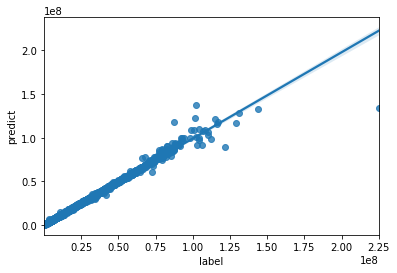

In [96]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

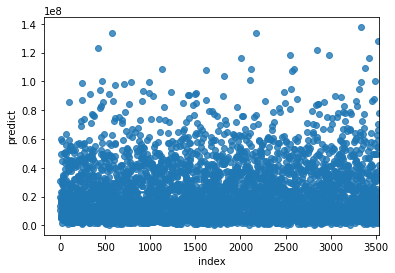

In [111]:
sns.regplot(x = 'index', y = 'predict', data = final_result)

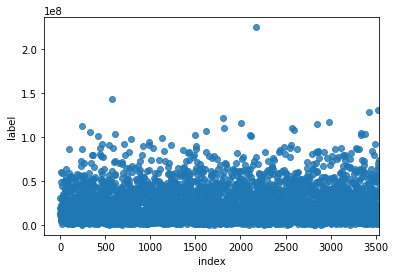

In [113]:
sns.regplot(x = 'index', y = 'label', data = final_result)

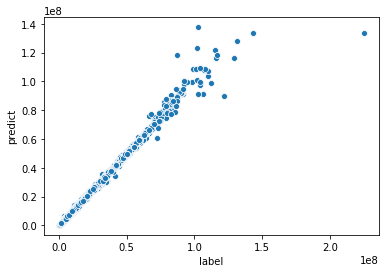

In [115]:
sns.scatterplot(x = 'label', y = 'predict', data = final_result)

In [158]:
final_result_short=final_result.iloc[1200:1300,:-1]

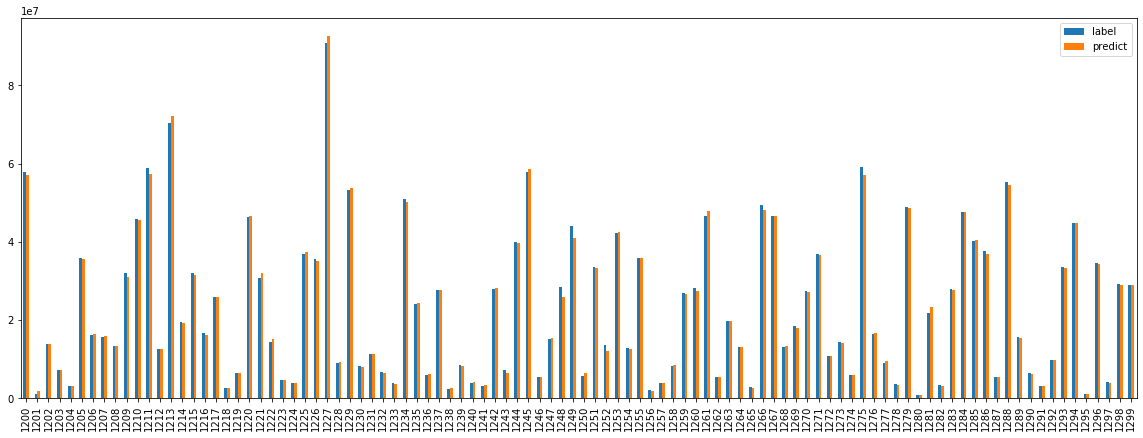

In [159]:
final_result_short.plot(kind='bar',figsize=(20, 7))


In [134]:
final_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    3538 non-null   float64
 1   predict  3538 non-null   float64
 2   index    3538 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 83.0 KB


In [152]:
l=final_result.iloc[1131,1]
l

108564591.46866237

In [153]:
p=final_result.iloc[1131,0]
p

98808000.0

In [151]:
l-p

9756591.468662366

In [157]:
(l-p)/l*100

8.986900182347805

In [174]:
df_np.shape

(35379, 17)

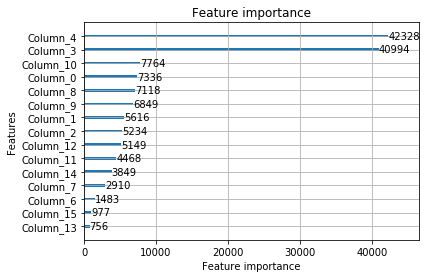

In [179]:
lgb.plot_importance(model)

In [162]:
test_data=pd.read_excel('/Users/bomi/bigcon_personal/dataset/eval data/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx',header=1)

In [163]:
test_data

방송일시      노출(분)    마더코드    상품코드                   상품명 상품군  \
0    2020-06-01 06:20:00  20.000000  100650  201971       잭필드 남성  반팔셔츠 4종  의류   
1    2020-06-01 06:40:00  20.000000  100650  201971       잭필드 남성  반팔셔츠 4종  의류   
2    2020-06-01 07:00:00  20.000000  100650  201971       잭필드 남성  반팔셔츠 4종  의류   
3    2020-06-01 07:20:00  20.000000  100445  202278  쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티  속옷   
4    2020-06-01 07:40:00  20.000000  100445  202278  쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티  속옷   
...                  ...        ...     ...     ...                   ...  ..   
2886 2020-07-01 00:20:00  20.000000  100660  201989       쉴렉스  안마의자 렌탈서비스  무형   
2887 2020-07-01 00:40:00  20.000000  100660  201989       쉴렉스  안마의자 렌탈서비스  무형   
2888 2020-07-01 01:00:00  20.000000  100660  201989       쉴렉스  안마의자 렌탈서비스  무형   
2889 2020-07-01 01:20:00  20.000000  100261  200875        아놀드파마 티셔츠레깅스세트  의류   
2890 2020-07-01 01:40:00  15.933333  100261  200875        아놀드파마 티셔츠레깅스세트  의류   

       판매단가  취급액  
0     59800  NaN  
1     59800  NaN  
2     59800  NaN  
3     69900  NaN  
4     69900  NaN  
...     ...  ...  
2886      0  NaN  
2887      0  NaN  
2888      0  NaN  
2889  69900  NaN  
2890  69900  NaN  

[2891 rows x 8 columns]